In [27]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score

d = make_classification(100, 2, n_redundant=0)
x_train, x_test, y_train, y_test  = train_test_split(d[0], d[1], test_size=0.2, random_state=42)
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)



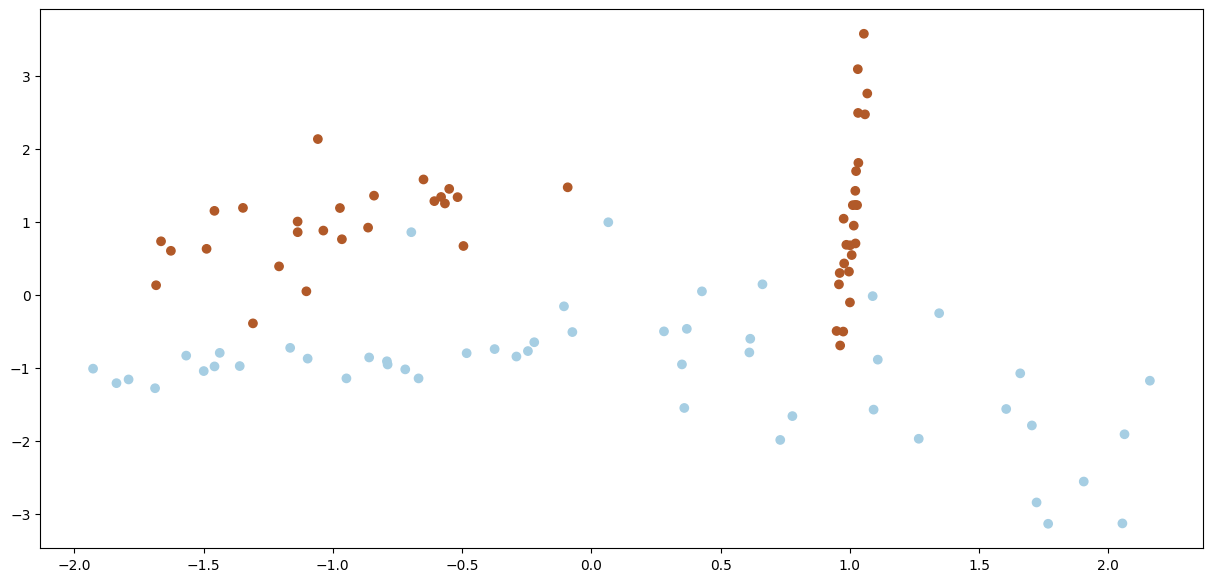

In [25]:
from matplotlib import pyplot as plt
plt.scatter(d[0][:,0],d[0][:,1],c=d[1],cmap=plt.cm.Paired)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1371 non-null   float64
 1   1       1371 non-null   float64
 2   2       1371 non-null   float64
 3   3       1371 non-null   float64
 4   4       1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
0.9803921568627451 0.984251968503937 0.9765625


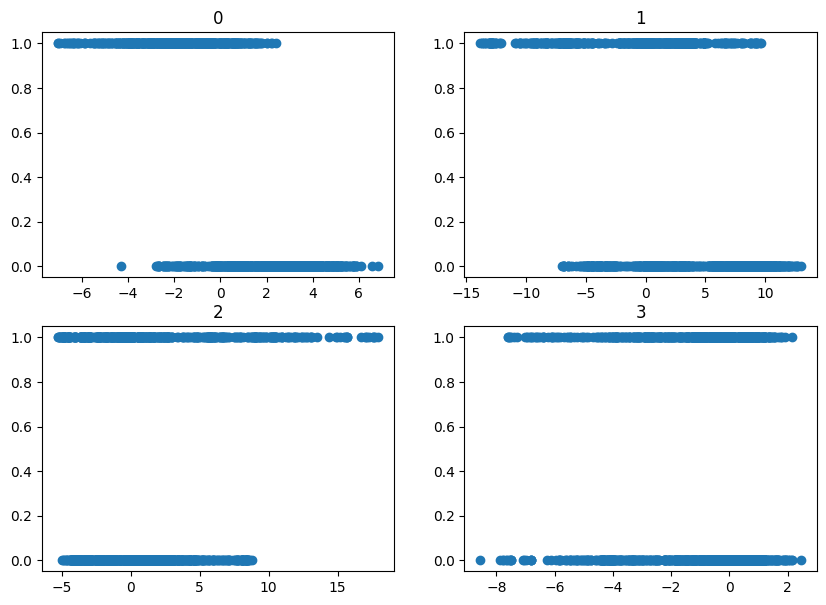

In [115]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score

df = pd.read_table("data/data_banknote_authentication.txt", sep=',')
df.rename({df.columns[i]:str(i) for i in range(len(df.columns))}, axis=1, inplace=True)
df.info()

X = df[['0', '1', '2', '3']]
Y = df['4']

plt.rcParams['figure.figsize'] = [10, 7]
for i in range(4):
    plt.subplot(2,2,i + 1)
    plt.scatter(X[str(i)], Y)
    plt.title(str(i))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f1, recall, precision)


МЕТОД ОПОРНЫХ ВЕКТОРОВ

C:\Users\artem\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


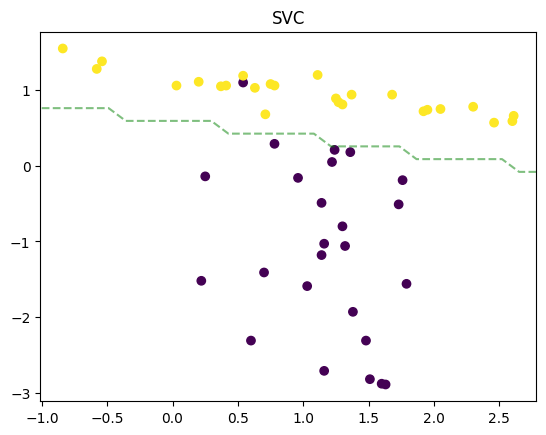

In [68]:
import pandas as pd
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_table('data/ex5_svc1.txt', delimiter=',', names=['1','2','3'])
X = df[['1','2']]
Y = df['3']

svc = SVC(kernel='linear', C=1.0)
svc.fit(X, Y)

ax = plt.scatter(x=X.iloc[:,0], y=X.iloc[:,1], c=Y)
plt.title("SVC")
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = svc.predict(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='g', levels=[0,1,2], alpha=0.5, linestyles=['--', '-', '--'])


0.9166666666666666 0.9166666666666666 0.9166666666666666


C:\Users\artem\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


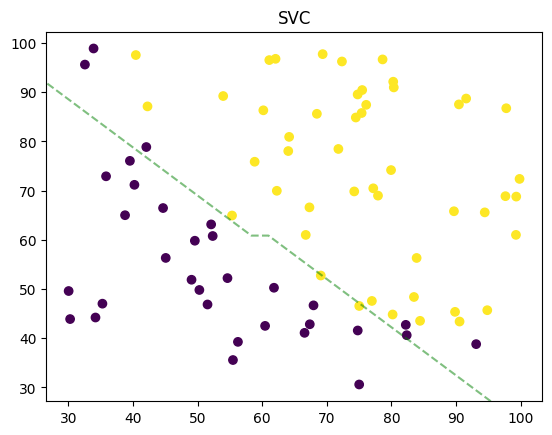

In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_table('data/D_09_BinaryClassification.txt', delimiter=',', names=['X1','X2','Y'])
X = df.iloc[:,:2]
Y = df.iloc[:,2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

svc1 = SVC(kernel='linear', C=10**5)
svc1.fit(x_train, y_train)

y_pred = svc1.predict(x_test)

recall = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(recall, prec, f1)

ax = plt.scatter(x=x_train.iloc[:,0], y=x_train.iloc[:,1], c=y_train)
plt.title("SVC")
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = svc1.predict(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='g', levels=[0,1,2], alpha=0.5, linestyles=['--', '-', '--'])



linear svc: recall = 0.5714285714285714, precision = 1.0, f1 = 0.7272727272727273
rbf_gamma_low: recall = 1.0, precision = 1.0, f1 = 1.0
rbf_gamma_norm: recall = 1.0, precision = 1.0, f1 = 1.0
rbf_gamma_high: recall = 1.0, precision = 1.0, f1 = 1.0
poly_clf_5: recall = 1.0, precision = 0.875, f1 = 0.9333333333333333
poly_clf_8: recall = 1.0, precision = 0.7, f1 = 0.8235294117647058


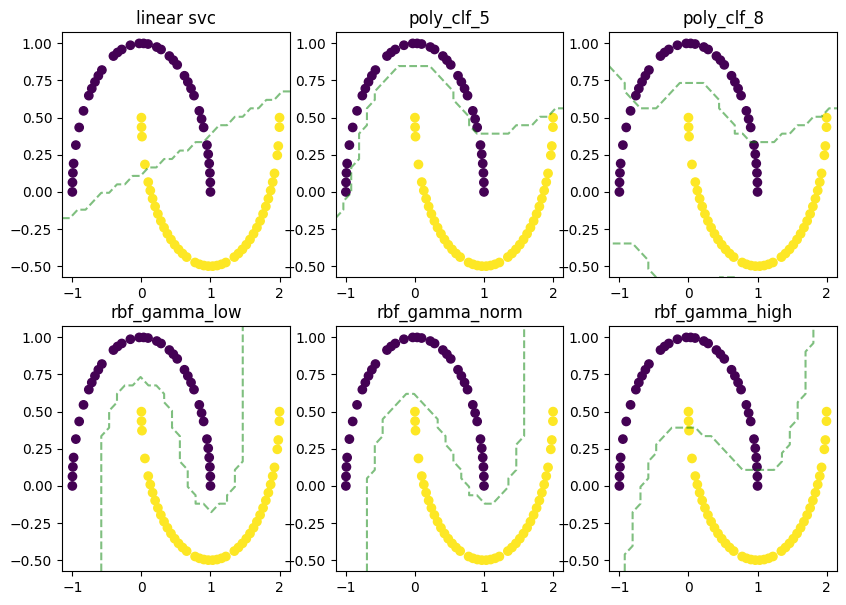

In [5]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

moons = make_moons()
X = moons[0]
Y = moons[1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

svc2 = SVC(kernel='linear', C=float(10**5))
svc2.fit(x_train, y_train)

gamma = 1/(2*x_train.var())
gammalow = 1/(x_train.var())
gammahigh = 1/(2*2*x_train.var())
rbf_low = rbf_clf = SVC(kernel='rbf', gamma=gammalow)
rbf_low.fit(x_train, y_train)

rbf_norm = rbf_clf = SVC(kernel='rbf', gamma=gamma)
rbf_norm.fit(x_train, y_train)

rbf_high = rbf_clf = SVC(kernel='rbf', gamma=gammahigh)
rbf_high.fit(x_train, y_train)

poly_clf_5 = SVC(kernel='poly', degree=5)
poly_clf_5.fit(x_train, y_train)

poly_clf_8 = SVC(kernel='poly', degree=8)
poly_clf_8.fit(x_train, y_train)

def metrics(model, x, y, model_name):
    y_predicted = model.predict(x_test)
    recall = recall_score(y, y_predicted)
    precision = precision_score(y, y_predicted)
    f1 = f1_score(y, y_predicted)
    print(f"{model_name}: recall = {recall}, precision = {precision}, f1 = {f1}")

def plot_boundary(x, y, model, title):
    ax = plt.scatter(x=x[:,0], y=x[:,1], c=y)
    plt.title(title)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = model.predict(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='g', levels=[0,1,2], alpha=0.5, linestyles=['--', '-', '--'])

metrics(svc2, x_test, y_test, "linear svc")
metrics(rbf_low, x_test, y_test, "rbf_gamma_low")
metrics(rbf_norm, x_test, y_test, "rbf_gamma_norm")
metrics(rbf_high, x_test, y_test, "rbf_gamma_high")
metrics(poly_clf_5, x_test, y_test, "poly_clf_5")
metrics(poly_clf_8, x_test, y_test, "poly_clf_8")

plt.rcParams['figure.figsize'] = [10, 7]
plt.subplot(2,3,1)
plot_boundary(x_train, y_train, svc2, "linear svc")
plt.subplot(2,3,2)
plot_boundary(x_train, y_train, poly_clf_5, "poly_clf_5")
plt.subplot(2,3,3)
plot_boundary(x_train, y_train, poly_clf_8, "poly_clf_8")
plt.subplot(2,3,4)
plot_boundary(x_train, y_train, rbf_low, "rbf_gamma_low")
plt.subplot(2,3,5)
plot_boundary(x_train, y_train, rbf_norm, "rbf_gamma_norm")
plt.subplot(2,3,6)
plot_boundary(x_train, y_train, rbf_high, "rbf_gamma_high")


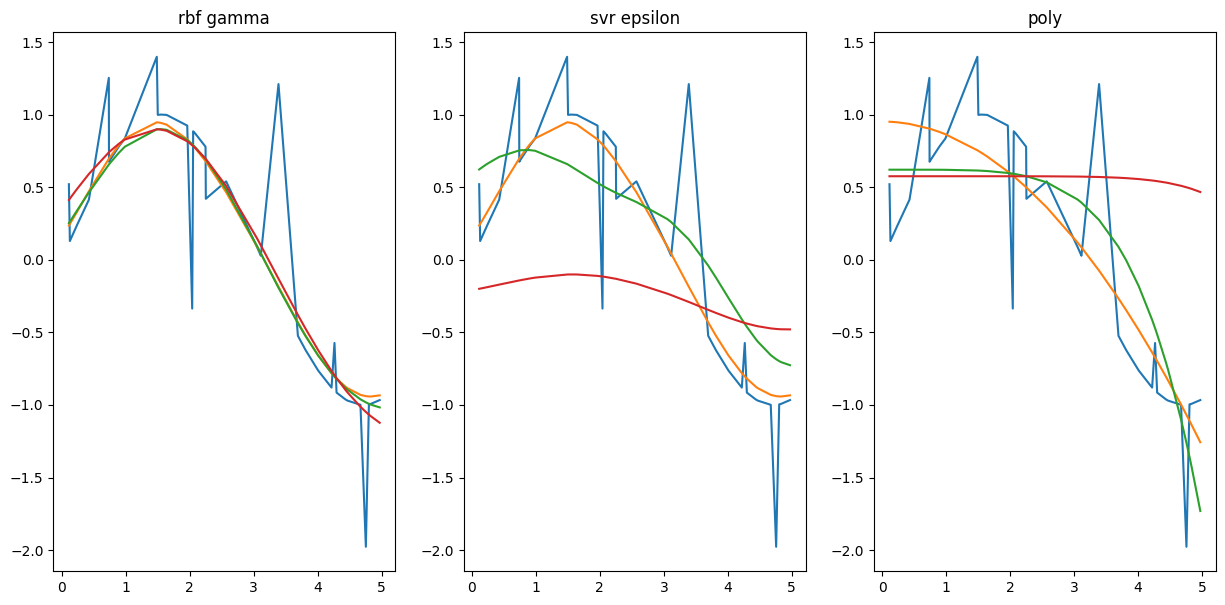

In [23]:
import numpy as np
from sklearn.svm import SVR
from matplotlib import pyplot as plt

X = np.sort(5 * np.random.rand(40, 1), axis=0)
Y = np.sin(X).ravel()
Y[::5] += 3 * (0.5 - np.random.rand(8))

gamma = 1/(2*X.var())
gammalow = 1/(X.var())
gammahigh = 1/(2*2*X.var())

rbf_low = SVR(kernel='rbf', gamma=gammalow)
rbf_low.fit(X, Y)

rbf_norm = rbf_clf = SVR(kernel='rbf', gamma=gamma)
rbf_norm.fit(X, Y)

rbf_high = rbf_clf = SVR(kernel='rbf', gamma=gammahigh)
rbf_high.fit(X, Y)

svr_low = SVR(kernel='rbf', epsilon=0.1)
svr_low.fit(X, Y)

svr_mid = SVR(kernel='rbf', epsilon=0.5)
svr_mid.fit(X, Y)

svr_high = SVR(kernel='rbf', epsilon=1.5)
svr_high.fit(X, Y)

poly_clf_2 = SVR(kernel='poly', degree=2)
poly_clf_2.fit(X, Y)

poly_clf_5 = SVR(kernel='poly', degree=5)
poly_clf_5.fit(X, Y)

poly_clf_8 = SVR(kernel='poly', degree=8)
poly_clf_8.fit(X, Y)

plt.rcParams['figure.figsize'] = [15, 7]

plt.subplot(1,3,1)
plt.plot(X, Y)
plt.title('rbf gamma')
plt.plot(X, rbf_low.predict(X), label="rbf_gamma_low")
plt.plot(X, rbf_norm.predict(X), label="rbf_gamma_norm")
plt.plot(X, rbf_high.predict(X), label="rbf_gamma_high")


plt.subplot(1,3,2)
plt.plot(X, Y)
plt.title('svr epsilon')
plt.plot(X, svr_low.predict(X), label="svr_epsilon_low")
plt.plot(X, svr_mid.predict(X), label="svr_epsilon_mid")
plt.plot(X, svr_high.predict(X), label="svr_epsilon_high")


plt.subplot(1,3,3)
plt.plot(X, Y)
plt.title('poly')
plt.plot(X, poly_clf_2.predict(X), label="poly_clf_2")
plt.plot(X, poly_clf_5.predict(X), label="poly_clf_5")
plt.plot(X, poly_clf_8.predict(X), label="poly_lf_8")

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/Salary_Data.csv")
df.dropna(inplace=True)
x = df[['Age', 'Years of Experience']]
y = df['Salary']
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.8)
rbf = SVR(kernel='rbf', C=1000, gamma=0.5)
rbf.fit(x_train, y_train)
y_pred = rbf.predict(x_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(r2, rmse)



0.7837358519939057 24832.80904293922


CV&Pipeline&CTransforms

In [92]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


df = pd.read_csv('data/tips.csv')
y = df['total_bill']
x = df.iloc[:,1:]
x.iloc[:,1] = LabelBinarizer().fit_transform(x.iloc[:,1]).astype(int)
x.iloc[:,2] = LabelBinarizer().fit_transform(x.iloc[:,2]).astype(int)
x.iloc[:,3] = LabelEncoder().fit_transform(x.iloc[:,3]).astype(int)
x.iloc[:,4] = LabelBinarizer().fit_transform(x.iloc[:,4]).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.8)

pipe = Pipeline([('scaler', StandardScaler()), ('svr', SVR(kernel='poly'))], verbose=True)

final_score = pipe.fit(x_train, y_train).score(x_test, y_test)
print(f'Base model: {final_score}')

tune_score = pipe.set_params(svr__C=10, svr__kernel='linear').fit(x_train, y_train).score(x_test, y_test)
print(f'Tune model: {tune_score}')


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   0.0s
Base model: 0.5214160037138122
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   0.0s
Tune model: 0.6627773015233347


In [111]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/insurance.csv')
print(df.info())
print(df)

target = df['charges']
x = df.drop('charges', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, target, train_size=0.8, random_state=42)
cat_x_train = x_train.select_dtypes('object')
num_x_train = x_train.select_dtypes(['int64', 'float64'])

cat_x_test = x_test.select_dtypes('object')
num_x_test = x_test.select_dtypes(['int64', 'float64'])

imputer = SimpleImputer(strategy='median')
s_imputer = SimpleImputer(strategy='constant', fill_value='unknown')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333  

TypeError: Pipeline.__init__() missing 1 required positional argument: 'steps'